In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [47]:
dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:, -1].values

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size =0.25, random_state =0 )

In [49]:
#feature scaler is not necessory but it will improve training performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train) # apply on whole x data 
x_test=scaler.transform(x_test)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [51]:
# predict a new result
classifier.predict(scaler.transform([[30,87000]])) # tranformation to correct scale is needed for correct results 

array([0], dtype=int64)

In [52]:
# predict test result 
y_pred = classifier.predict(x_test)
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 1]]


In [53]:
#making the confusion matrix > show how many mistakes and correct predictions 

In [54]:
from sklearn.metrics import confusion_matrix , accuracy_score
matrix = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.89

In [55]:
print (matrix) # 65 correct predictions and 3 incorrect for class 0(customers who didn't buy SUV) and 24 correct predictions and 8 incorrect predictions for class 1 (people who brought SUV) 

[[65  3]
 [ 8 24]]


In [56]:
#visualising training set results plot age against salary

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


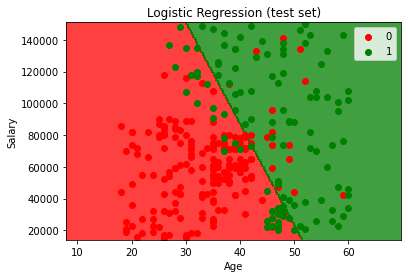

In [59]:
from matplotlib.colors import ListedColormap
x_set,y_set=scaler.inverse_transform(x_train),y_train
x1,x2 = np.meshgrid(np.arange(start =x_set[:,0].min() - 10,stop =x_set[:, 0].max() + 10,step=0.25),
                    np.arange(start =x_set[:,1].min() - 1000,stop =x_set[:, 1].max() + 1000,step=0.25)) 
plt.contourf(x1,x2,classifier.predict(scaler.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label =j)
plt.title('Logistic Regression (training set)')    
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


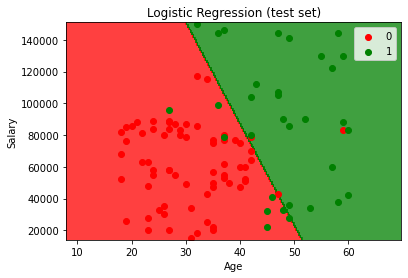

In [60]:
from matplotlib.colors import ListedColormap
x_set,y_set=scaler.inverse_transform(x_test),y_test
x1,x2 = np.meshgrid(np.arange(start =x_set[:,0].min() - 10,stop =x_set[:, 0].max() + 10,step=0.25),
                    np.arange(start =x_set[:,1].min() - 1000,stop =x_set[:, 1].max() + 1000,step=0.25)) 
plt.contourf(x1,x2,classifier.predict(scaler.transform(np.array([x1.ravel(),x2.ravel()]).T)).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label =j)
plt.title('Logistic Regression (test set)')    
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [ ]:
# prediction r ok. Will b better to build model that will predict better